In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Load and Parse files

In [2]:
# Function to load results from a CSV file
def load_results(csv_filename):
    if os.stat(csv_filename).st_size == 0:
        print(f"Warning: {csv_filename} is empty. Skipping this file.")
        return None
    return pd.read_csv(csv_filename)

# Function to extract parameters from the filename
def parse_filename(filename):
    parts = filename.replace('.csv', '').split('_')
    optimizer_name = parts[0]
    lr = 'Unknown'
    momentum = 'None'
    dataset = parts[-1]

    for i, part in enumerate(parts):
        if part == "lr" and i + 1 < len(parts):
            lr = parts[i + 1]
        elif part == "momentum" and i + 1 < len(parts):
            momentum = parts[i + 1]
    
    return optimizer_name, lr, momentum, dataset


## 6 and 7

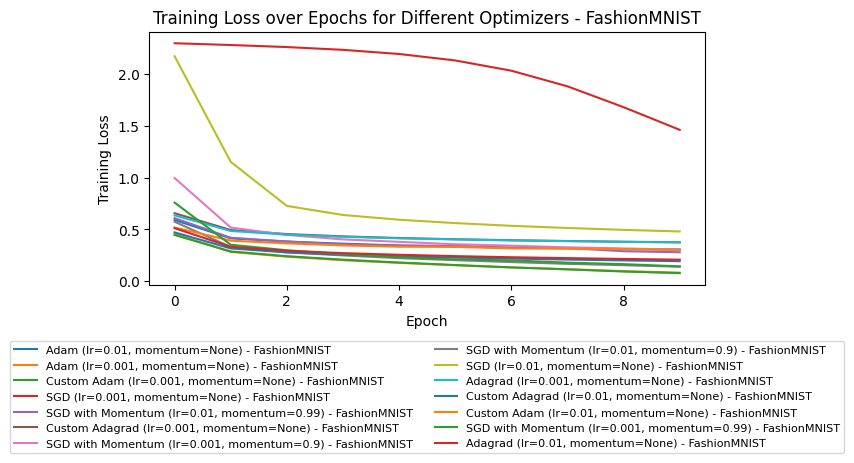

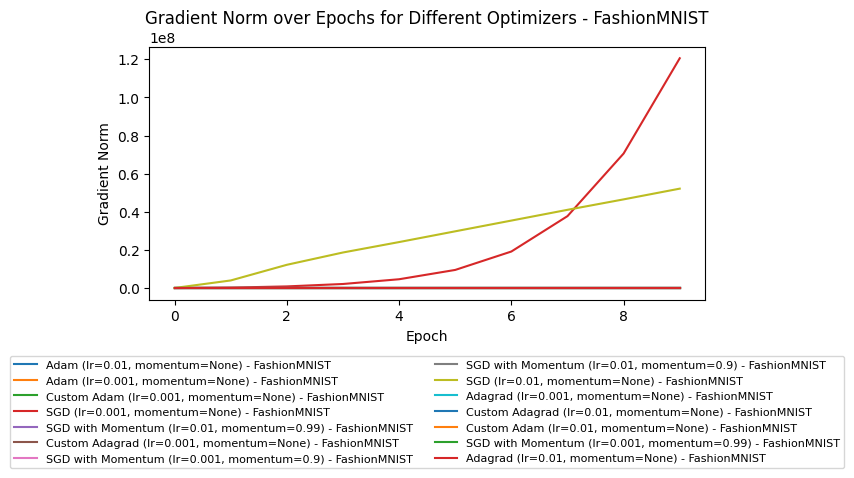

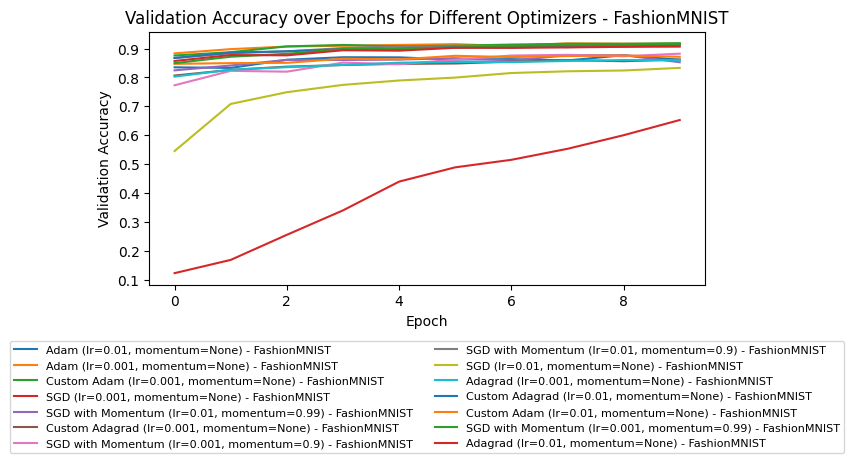

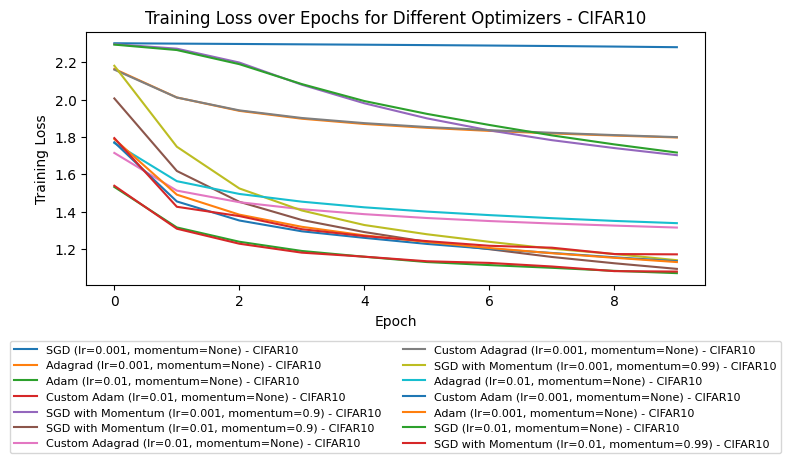

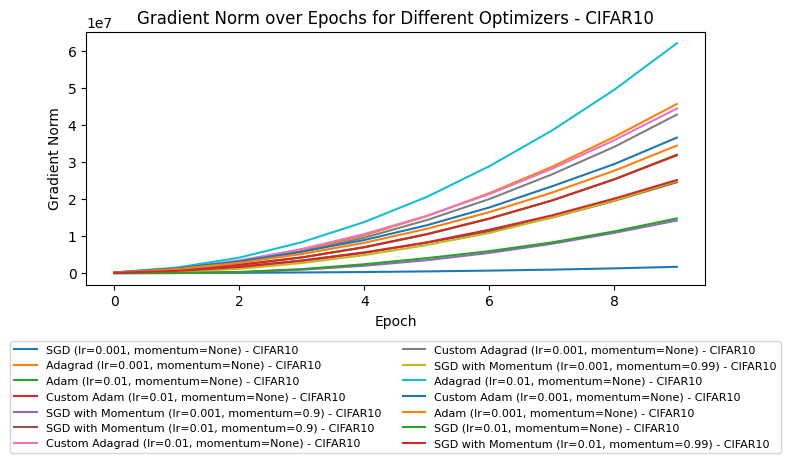

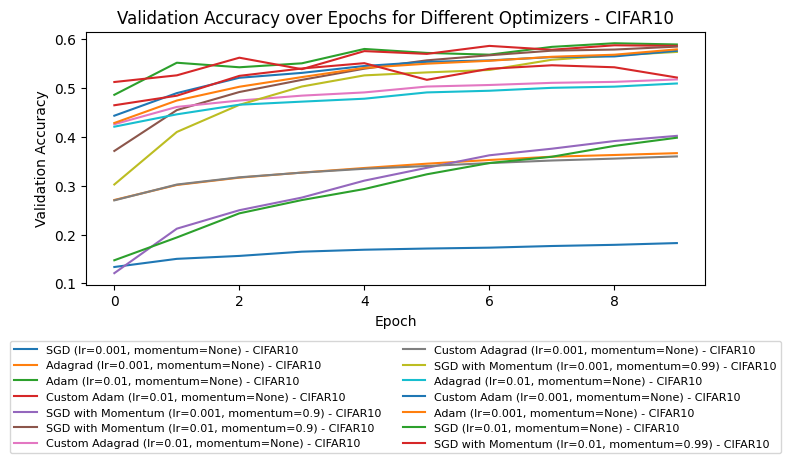

In [3]:
# Separate plot function for each dataset
def plot_results_for_dataset(dataset_name, results_dir='results'):
    losses_by_optimizer = {}
    grad_norms_by_optimizer = {}
    val_accuracies_by_optimizer = {}

    for file in os.listdir(results_dir):
        if file.endswith(".csv") and file.endswith(f"{dataset_name}.csv"):
            file_path = os.path.join(results_dir, file)
            data = load_results(file_path)
            if data is None:
                continue
            
            optimizer_name, lr, momentum, dataset = parse_filename(file)
            label = f"{optimizer_name} (lr={lr}, momentum={momentum}) - {dataset}"

            losses_by_optimizer[label] = data['train_loss']
            grad_norms_by_optimizer[label] = data['grad_norm']
            val_accuracies_by_optimizer[label] = data['val_accuracy']

    # Plot Training Loss
    plt.figure(figsize=(8, 5))
    for label, losses in losses_by_optimizer.items():
        plt.plot(losses, label=label)
    plt.xlabel('Epoch')
    plt.ylabel('Training Loss')
    plt.title(f'Training Loss over Epochs for Different Optimizers - {dataset_name}')
    plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=2, prop={'size': 8})
    plt.tight_layout()
    plt.show()

    # Plot Gradient Norm
    plt.figure(figsize=(8, 5))
    for label, grad_norms in grad_norms_by_optimizer.items():
        plt.plot(grad_norms, label=label)
    plt.xlabel('Epoch')
    plt.ylabel('Gradient Norm')
    plt.title(f'Gradient Norm over Epochs for Different Optimizers - {dataset_name}')
    plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=2, prop={'size': 8})
    plt.tight_layout()
    plt.show()

    # Plot Validation Accuracy
    plt.figure(figsize=(8, 5))
    for label, val_accuracies in val_accuracies_by_optimizer.items():
        plt.plot(val_accuracies, label=label)
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.title(f'Validation Accuracy over Epochs for Different Optimizers - {dataset_name}')
    plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=2, prop={'size': 8})
    plt.tight_layout()
    plt.show()

# Call the function separately for each dataset
plot_results_for_dataset('FashionMNIST')
plot_results_for_dataset('CIFAR10')

## 9

In [4]:
results_dir = 'results'

# Define the datasets and optimizer names
datasets = ["FashionMNIST", "CIFAR10"]
optimizer_names = ["SGD", "SGD with Momentum", "Adagrad", "Adam", "Custom Adagrad", "Custom Adam"]

# Iterate through each combination of optimizer, dataset, and hyperparameters
for dataset in datasets:
    for optimizer in optimizer_names:
        # Define expected file format
        # file_prefix = optimizer.replace(" ", "")
        for lr in [0.001, 0.01]:
            for momentum in ["None", "0.9", "0.99"]:
                if optimizer != "SGD with Momentum":
                    momentum = "None"
                if optimizer == "SGD with Momentum":
                    momentum == "0.9" or momentum == "0.99"
                # Construct the file name
                file_name = f"{optimizer}_lr_{lr}_momentum_{momentum}_{dataset}.csv"
                file_path = os.path.join(results_dir, file_name)

                # Check if the file exists before trying to load it
                if os.path.exists(file_path):
                    try:
                        # Load the results file
                        data = pd.read_csv(file_path)

                        # Check if 'val_accuracy' is present
                        if 'val_accuracy' in data.columns:
                            # Extract final validation accuracy
                            final_test_accuracy = data['val_accuracy'].iloc[-1]
                            # Display results
                            print(f"{optimizer} on {dataset} with lr={lr} and momentum={momentum}: Test Accuracy: {final_test_accuracy}%\n")
                        else:
                            print(f"File {file_name} does not contain 'val_accuracy' column.\n")
                    
                    except pd.errors.EmptyDataError:
                        print(f"Warning: {file_name} is empty. Skipping this file.\n")
                else:
                    print(f"File {file_name} does not exist.\n")

SGD on FashionMNIST with lr=0.001 and momentum=None: Test Accuracy: 0.6529166666666667%

SGD on FashionMNIST with lr=0.001 and momentum=None: Test Accuracy: 0.6529166666666667%

SGD on FashionMNIST with lr=0.001 and momentum=None: Test Accuracy: 0.6529166666666667%

SGD on FashionMNIST with lr=0.01 and momentum=None: Test Accuracy: 0.8331666666666667%

SGD on FashionMNIST with lr=0.01 and momentum=None: Test Accuracy: 0.8331666666666667%

SGD on FashionMNIST with lr=0.01 and momentum=None: Test Accuracy: 0.8331666666666667%

File SGD with Momentum_lr_0.001_momentum_None_FashionMNIST.csv does not exist.

SGD with Momentum on FashionMNIST with lr=0.001 and momentum=0.9: Test Accuracy: 0.8823333333333333%

SGD with Momentum on FashionMNIST with lr=0.001 and momentum=0.99: Test Accuracy: 0.9165%

File SGD with Momentum_lr_0.01_momentum_None_FashionMNIST.csv does not exist.

SGD with Momentum on FashionMNIST with lr=0.01 and momentum=0.9: Test Accuracy: 0.9149166666666668%

SGD with Momentu

## 10

In [5]:
# Analysis function to find the best performing optimizer
def analyze_results(results_dir='results'):
    best_overall_accuracy = 0
    best_optimizer = None

    for file in os.listdir(results_dir):
        if file.endswith(".csv"):
            file_path = os.path.join(results_dir, file)
            data = load_results(file_path)
            if data is None:
                continue
            optimizer_name, lr, momentum, dataset = parse_filename(file)
            max_val_accuracy = data['val_accuracy'].max()

            # Update best accuracy and optimizer if current one is better
            if max_val_accuracy > best_overall_accuracy:
                best_overall_accuracy = max_val_accuracy
                best_optimizer = {
                    'optimizer': optimizer_name,
                    'learning_rate': lr,
                    'momentum': momentum,
                    'dataset': dataset,
                    'accuracy': max_val_accuracy
                }

    # Print best performing optimizer and configuration
    print("\nBest Performing Optimizer:")
    print(f"Optimizer: {best_optimizer['optimizer']}")
    print(f"Learning Rate: {best_optimizer['learning_rate']}")
    print(f"Momentum: {best_optimizer['momentum']}")
    print(f"Dataset: {best_optimizer['dataset']}")
    print(f"Validation Accuracy: {best_optimizer['accuracy']}")

# Run analysis to find the best performing optimizer
analyze_results()


Best Performing Optimizer:
Optimizer: Custom Adam
Learning Rate: 0.001
Momentum: None
Dataset: FashionMNIST
Validation Accuracy: 0.9183333333333332
